# Pregunta 1
---

![cuestionario1-1.png](../images/cuestionario1-1.png)

---

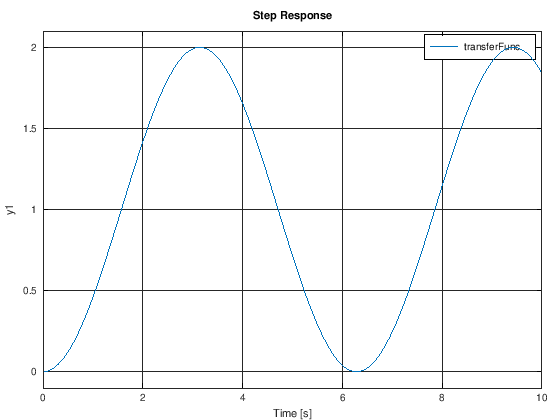

In [1]:
pkg load control
s = tf('s');
% Función transferencia
transferFunc = 1/(s^2+1);
% Gráfica de respuesta al escalón
step (transferFunc)


La respuesta correcta es la C.

# Pregunta 2
---

![cuestionario1-2.png](../images/cuestionario1-2.png)

---

Para resolver este problema se puede aplicar Laplace, despejar $Y(s)$ y luego antitransformar. 
1. Aplico Laplace:
    $$ \mathcal{L} \left\{ \dot{y(t)} + y(t) = 1 (t) \right\}$$
    $$ s \cdot Y(s) - y_0 + Y(s) = \frac{1}{s} $$    

2. Despejo $Y(s)$:
    $$ Y(s) \cdot (s + 1) = \frac{1}{s} + y_0 $$
    $$ Y(s) = \frac{1/s + y_0}{s + 1} $$
    $$ Y(s) = \frac{1}{s^2 + s} + \frac{y_0}{s + 1} $$

3. Antitransformo por residuos:

- Llamo $Y1(s) = \frac{1}{s^2 + s} = \frac{1}{s \cdot (s+1)}$
    $$ \left. Res \, Y1(s) \right|_{s=0} = \lim\limits_{s \to 0} \frac{1 \cdot s}{s \cdot (s+1)} = 1$$
    $$ \left. Res \, Y1(s) \right|_{s=1} = \lim\limits_{s \to -1} \frac{1 \cdot (s+1)}{s \cdot (s+1)} = -1$$
    - Luego la antitransformada es:
    $$ y1(t) = 1 \cdot \exp(0t) + (-)1 \cdot \exp(-1t) = 1 - \exp (-t) $$
- Llamo $Y2(s) = \frac{y_0}{s+1}$:
    - La antitransformada de Y2(s) es:
    $$ y2(t) = y_0 \cdot \exp(-t) $$    

4. Luego el resultado es la suma de y1(t) + y2(t):
    $$ y(t) = 1 - \exp(-t) + y_0 \cdot \exp(-t) = $$
    $$ y(t) = 1 + (y_0 - 1) \cdot \exp(-t) $$

Por lo tanto la respuesta correcta es la opción 2
> _Nota: Luego de escribir todo me di cuenta que podría resolver directamente la ecuación $Y(s) = \frac{1 + y_0 \cdot s}{s \cdot (s+1)}$ por residuos, es más directo._
---
### Abajo una comprobación en Octave.

In [2]:
pkg load symbolic

syms s;
%elijo un valor de y0 al azar
y0 = 33;

Y1 = 1/(s^2+s);
Y2 = y0/(s+1);
Y = Y1 + Y2;
y1 = simplify(ilaplace(Y1))
y2 = simplify(ilaplace(Y2))
y = simplify(ilaplace(Y))

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.1.
y1 = (sym)

       -t
  1 - ℯ  

y2 = (sym)

      -t
  33⋅ℯ  

y = (sym)

          -t
  1 + 32⋅ℯ  



# Pregunta 3
---

![cuestionario1-3.png](../images/cuestionario1-3.png)

---

Este ejercicio es igual que el punto 1. Para resolverlo manual se debe hacer la antitransformada de la función escalón (step) multiplicada por la función transferencia.

Queda así:
    $$ Y(s) = \frac{1}{s \cdot (s^2-2s+2)} = $$

1. Escribo la función como producto de polos y ceros:

    $$ Y(s) = \frac{1}{ s \cdot (s - p1) \cdot (s - p2)} =$$
donde p1 y p2 son los polos de 1er orden que debo encontrar

2. Encuentro las raíces del polinomio de 2do orden para resolver por residuos:
> _Recordatorio: Para resolver la cuadrática se utiliza la fórmula $\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$, donde $a \cdot s^2 + b \cdot s + c = 0$._

3. El resultado es:
    $$ Y(s) = \frac{1}{s \cdot (s-p1) \cdot (s-p2)} $$
donde $p1 = 1+i$ y $p2 = 1-i$.

4. Resuelvo por residuos:
- Polo $s = 0$. 
    $$ \left. Res \, Y(s) \right|_{s=0} = \lim\limits_{s \to 0} \frac{1 \cdot s}{s \cdot (s^2-2s+2)} = \frac{1}{2}$$    

- Polo $s = 1+i$. 
$$ \left. Res \, Y(s) \right|_{s=p1} = \lim\limits_{s \to p1} \frac{1 \cdot (s-p1)}{s \cdot (s-p1) \cdot (s-p2))} = $$

$$ \frac{1}{1+i \cdot (1+i-(1-i)))} = \frac{1}{-2+2i} = $$

$$ = ...... = \frac{-1-i}{4} $$

- Polo $s = 1-i$.
$$ \left. Res \, Y(s) \right|_{s=p2} = \lim\limits_{s \to p2} \frac{1 \cdot (s-p2)}{s \cdot (s-p1) \cdot (s-p2))} = $$

$$ \frac{1}{1-i \cdot (1-i-(1+i)))} = \frac{1}{-2-2i} = $$

$$ = ..... = \frac{-1+i}{4} $$

4.Antitransformada:
    $$ \frac{1}{2} + \frac{-1}{4} \cdot \left\{ (-1-i) \cdot e^{(-1-i)t} + (-1+i) \cdot e^{(-1+i)t} \right\}= $$

Despejando y agrupando se llega a esta expresión:

$$ y (t) = \frac{1}{2} + \frac{-1}{2} \, e^t \, \left[ \cos(t) - \sin(t) \right]= $$

que equivale a (también se puede obtener de la ecuación anterior):

$$ y(t) = \frac{1}{2} + \frac{-\sqrt{2}}{2} \, e^t \, \cos(t + \frac{\pi}{4})= $$

Luego para verificar el resultado calculo algunos puntos con la calculadora y grafico:

| t | y(t) |
|---|------|
| 0 | -0,2 |
| 2 |  7,4 |
| 4 | -3,5 |
| 6 | -353 |
| 7 | -74  |
| 8 | 2392 |
| 10| 4595 |

```La respuesta correcta es la d.```

---
### Abajo se corrobora con Octave
---

In [3]:
pkg load control symbolic
% Calculo simbolico para verificar las cuentas
syms s;
Y = 1/(s*(s^2-2*s+2));
y = simplify(ilaplace(Y))

% Obtención del grafico para constatar respuesta
s = tf('s');
% Función transferencia
transferFunc = 1/(s^2-2*s+2);
% Gráfica de respuesta al escalón
[y1,t,X]=step (transferFunc,10);

y = (sym)

        t    ⎛    π⎞    
    √2⋅ℯ ⋅cos⎜t + ─⎟    
             ⎝    4⎠   1
  - ──────────────── + ─
           2           2



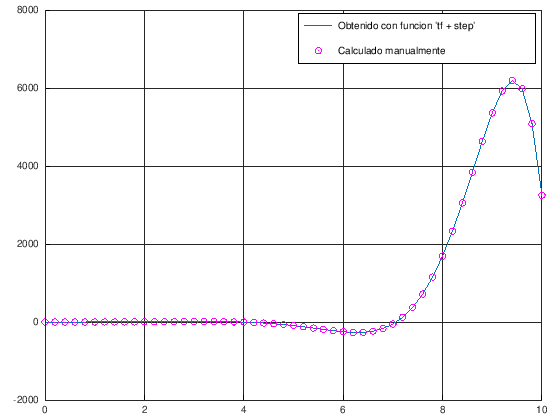

In [4]:
%Grafico junto a mi resultado para comparar
y2 = 0.5.*(1-(e.^t).*(cos(t)-sin(t))); %Resultado obtenido por metodo de los residuos
hold on
plot(t,y1)
plot(t,y2,"om")
legend("Obtenido con funcion 'tf + step' ","Calculado manualmente")
grid
hold off

# Pregunta 4
---

![cuestionario1-4.png](../images/cuestionario1-4.png)

---

Acá se presenta un problema similar a los anteriores donde se puede transformar la ecuación diferencial por Laplace y resolver.

1 - Aplico Laplace:
    $$ \mathcal{L} \left\{ M \, \ddot{x} + B \, \dot{x} = 1(t) \right\} $$ 
    $$ M s^2 X(s) + B s X(s) = \frac{1}{s} $$
    $$ X(s) \left( M s^2 + B s \right) = \frac{1}{s} $$
    $$ X(s) = \frac{1}{s \left( M s^2 + B s \right)} $$
    $$ X(s) = \frac{1}{s^2 \left( M s + B \right)} $$

No se como resolverlo pero en los apuntes de la teorica (clase 03) indica que es inestable. El segundo polo en el origen que aparece al resolver la ecuación diferencial es por la entrada del escalón. O sea, $X(s) = 1/s$ en las capturas de abajo.

![solución-pto4-1.png](../images/soluc1-4_1.png)
![solución-pto4-2.png](../images/soluc1-4_2.png)

Acá intenté una implementación en Octave y el resultado es similar. Quizás los valores de M y B deberían ser otros...

y = (sym)

            -t           
            ───          
             20  2       
           ℯ   ⋅Γ (-1/20)
  t - 20 + ──────────────
                 2⎛19⎞   
             20⋅Γ ⎜──⎟   
                  ⎝20⎠   

polos = (sym 2×1 matrix)

  ⎡-1/20⎤
  ⎢     ⎥
  ⎣  0  ⎦

xmin = 0
xmax =  10
ymin = -5


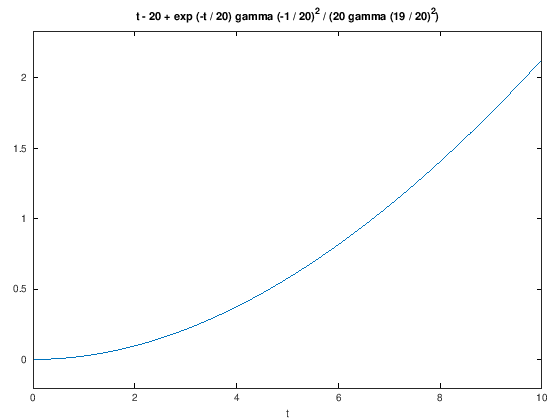

In [10]:
syms s;

%Elijo 2 valores de M y B
M = 20;
B = 1;

X = 1/s;
H = 1/(M*s^2+B*s);
Y = H*X;

% antitransformada
y = ilaplace(Y)
%obtengo los polos
[num den] = numden(Y);
polos = solve(den)
%grafico
xmin = 0, xmax = 10, ymin = -5, ymax = 5;
ezplot(y,[xmin xmax ymin ymax])

# Pregunta 5
---

![cuestionario1-5.png](../images/cuestionario1-5.png)

---

Al igual que los ejercicios anteriores aplico Laplace y resuelvo por el método de los residuos.
1. Laplace:    
    $$ Y(s) = \frac{32}{s \left( s^2 + 12s + 32 \right)} $$
    Polos: $0, -4, -8$.

2. Residuos: 
    $$ Res Y(s)|_{s=0} = ... = 1 $$
    $$ Res Y(s)|_{s=-4} = ... = -2 $$
    $$ Res Y(s)|_{s=-8} = ... = 1 $$
    
3. Resultado:
    $$ y(t) = (1 - 2e^{-4t} + e^{-8t}) u(t) $$
    
El ítem 4 es el correcto.
    